# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [74]:
train=pd.read_csv('../data/orange_small_churn_data.csv')
labels=pd.read_csv('../data/orange_small_churn_labels.csv',header=None,names=['label'])
train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


2\. Рассчитайте доли классов `отток` и `не отток`.

In [86]:
labels.label.value_counts()/len(labels)

-1    0.9256
 1    0.0744
Name: label, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [184]:
num_cols=train.columns[0:190]
cat_cols=train.columns[190:]
class1=-1
class2=1
ind_class1=labels.label==class1
ind_class2=labels.label==class2

In [266]:
num_corr=train.loc[ind_class1,num_cols].mean()-train.loc[ind_class2,num_cols].mean()
num_corr=abs(num_corr)
num_corr

Var1           1.670494
Var2           0.005181
Var3         167.782993
Var4           0.016095
Var5       66949.866756
Var6         205.473217
Var7           1.706359
Var8                NaN
Var9           5.964219
Var10     101756.860975
Var11          0.369193
Var12         11.550230
Var13        482.891378
Var14          0.571501
Var15               NaN
Var16          0.697777
Var17          2.684426
Var18          1.567064
Var19          0.596870
Var20               NaN
Var21         16.415344
Var22         20.092693
Var23          3.518694
Var24          0.406398
Var25          7.824903
Var26          0.016762
Var27          0.027051
Var28          5.559735
Var29          0.018692
Var30          0.511348
              ...      
Var161         1.285618
Var162     44561.183976
Var163     10475.285968
Var164         0.233830
Var165      8230.840216
Var166        10.427750
Var167              NaN
Var168        58.051653
Var169              NaN
Var170         0.498623
Var171     41570

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [270]:
def plot_dist(vars_,ncols_=2):
    nrows_= math.ceil(len(vars_)/ncols_)
    print (nrows_,ncols_)
    fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(15, 45))
    for idx, var in  enumerate(vars_): 
        row,col=int(idx/ncols_),idx%ncols_
        print (var,row,col)
        data1=train.loc[ind_class1,var]
        data1.rename(class1,inplace=True)
        data2=train.loc[ind_class2,var]
        data2.rename(class2,inplace=True)
        sns.kdeplot(data1,ax=axes[row,col])
        sns.kdeplot(data2,ax=axes[row,col])
        axes[row,col].set_title(var+' corr='+str(num_corr[var]))
        axes[row,col].legend()
    plt.show()


In [291]:
top20corr_var=num_corr.sort_values(ascending=False)[0:3].index
t=train.loc[:,top20corr_var]
t.fillna(0,inplace=True)
t['label']=labels
sns.pairplot(t,hue='label')
plt.show()

KeyboardInterrupt: 

10 2
Var131 0 0
Var69 0 1
Var53 1 0
Var177 1 1
Var180 2 0
Var114 2 1
Var111 3 0
Var113 3 1
Var153 4 0
Var154 4 1
Var59 5 0
Var124 5 1
Var10 6 0
Var33 6 1
Var139 7 0
Var38 7 1
Var5 8 0
Var182 8 1
Var36 9 0
Var92 9 1


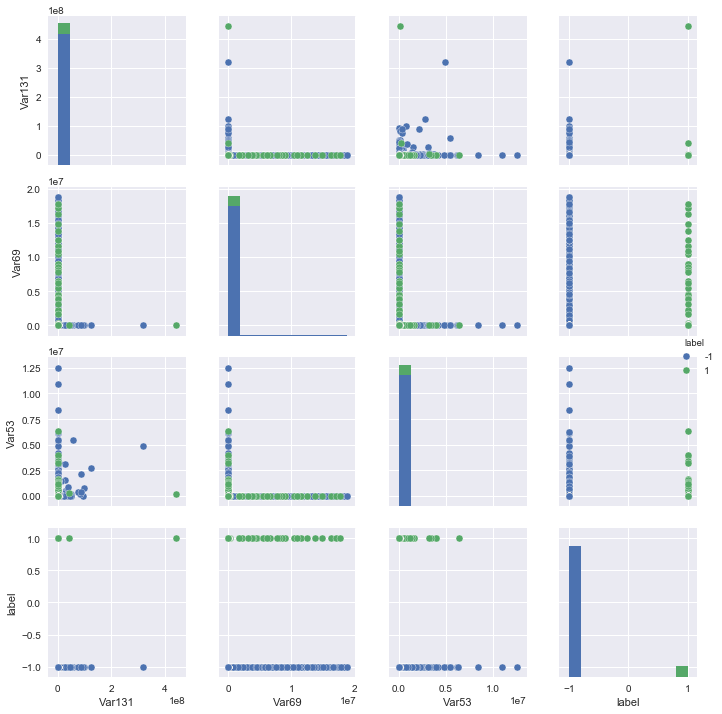

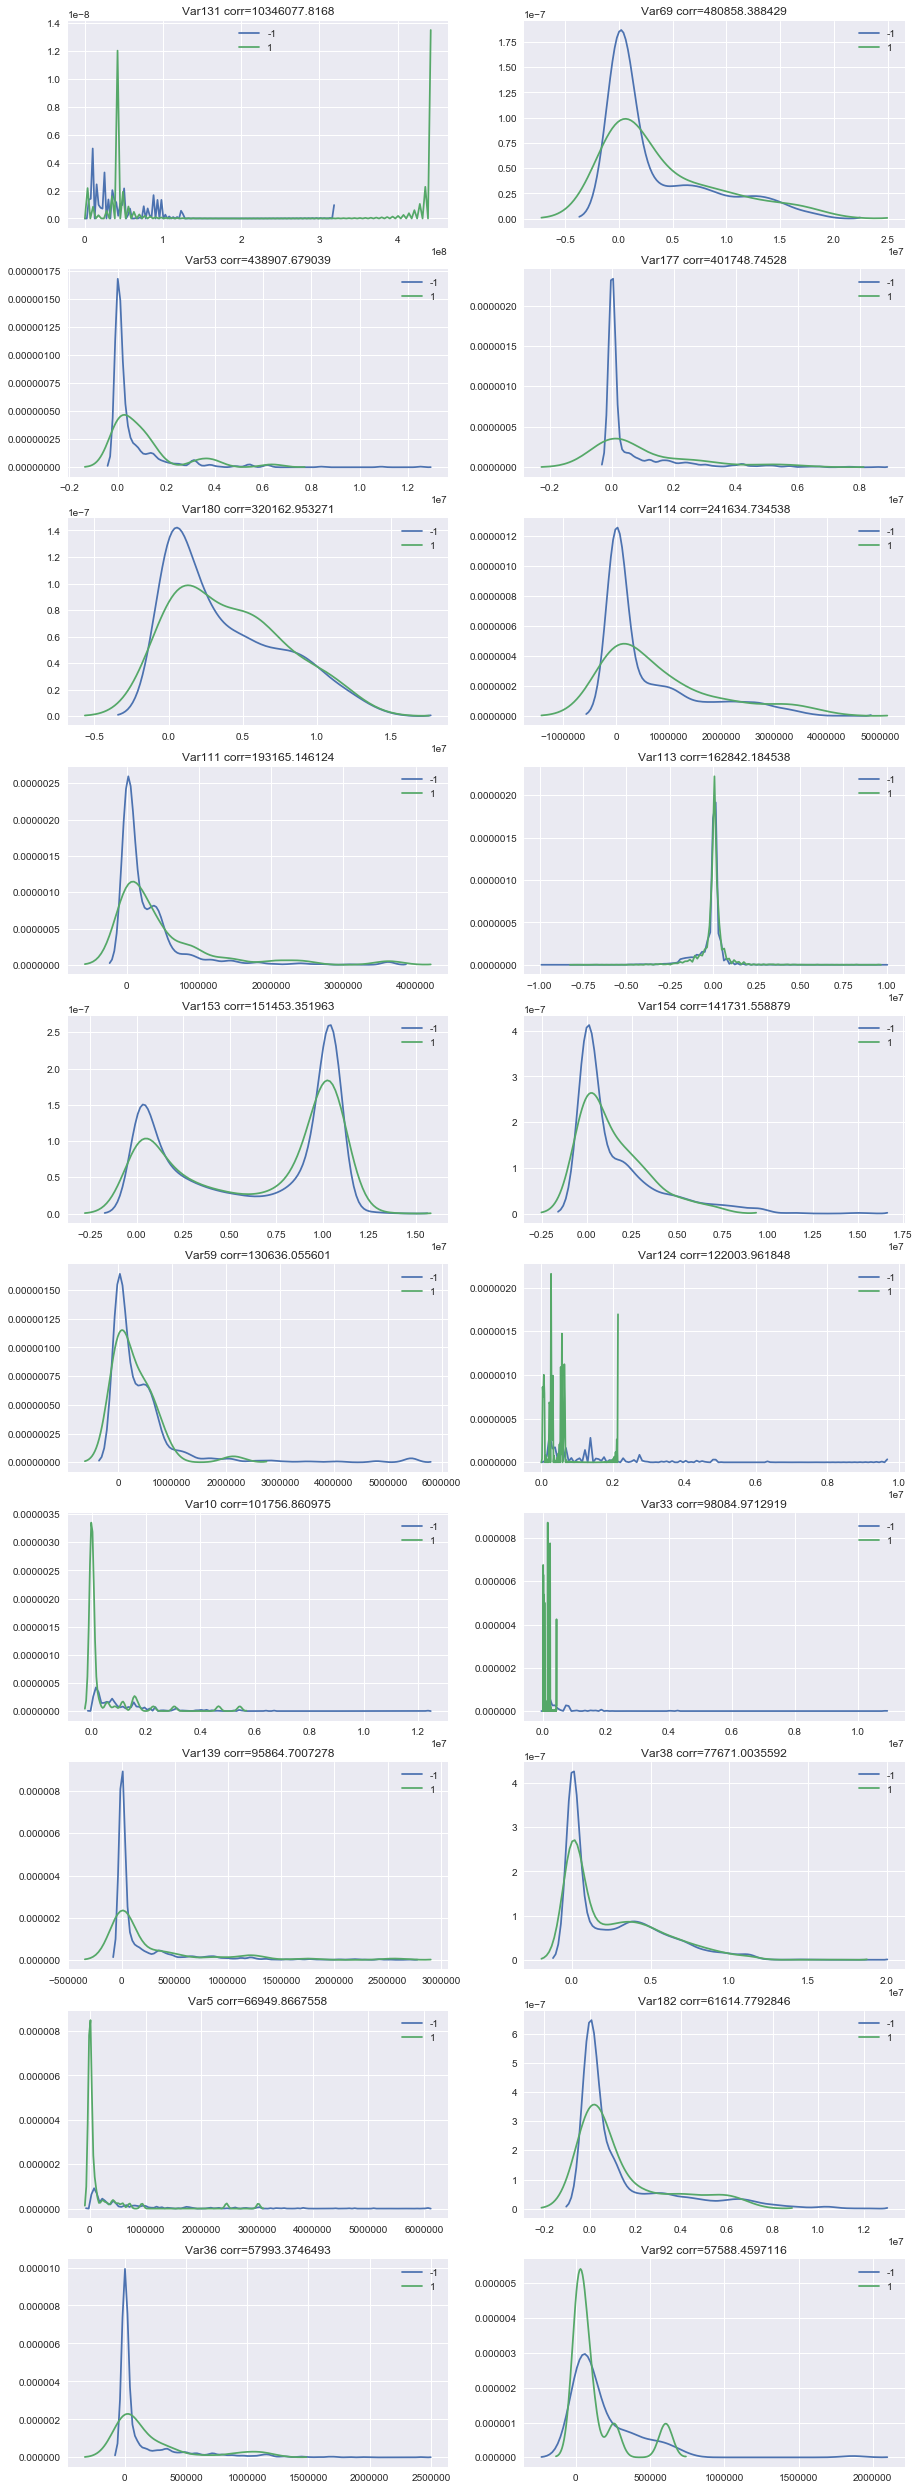

In [292]:
top20corr_var=num_corr.sort_values(ascending=False)[0:20].index
plot_dist(top20corr_var)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

5 2
Var77 0 0
Var150 0 1
Var36 1 0
Var25 1 1
Var7 2 0
Var146 2 1
Var24 3 0
Var96 3 1
Var120 4 0
Var10 4 1


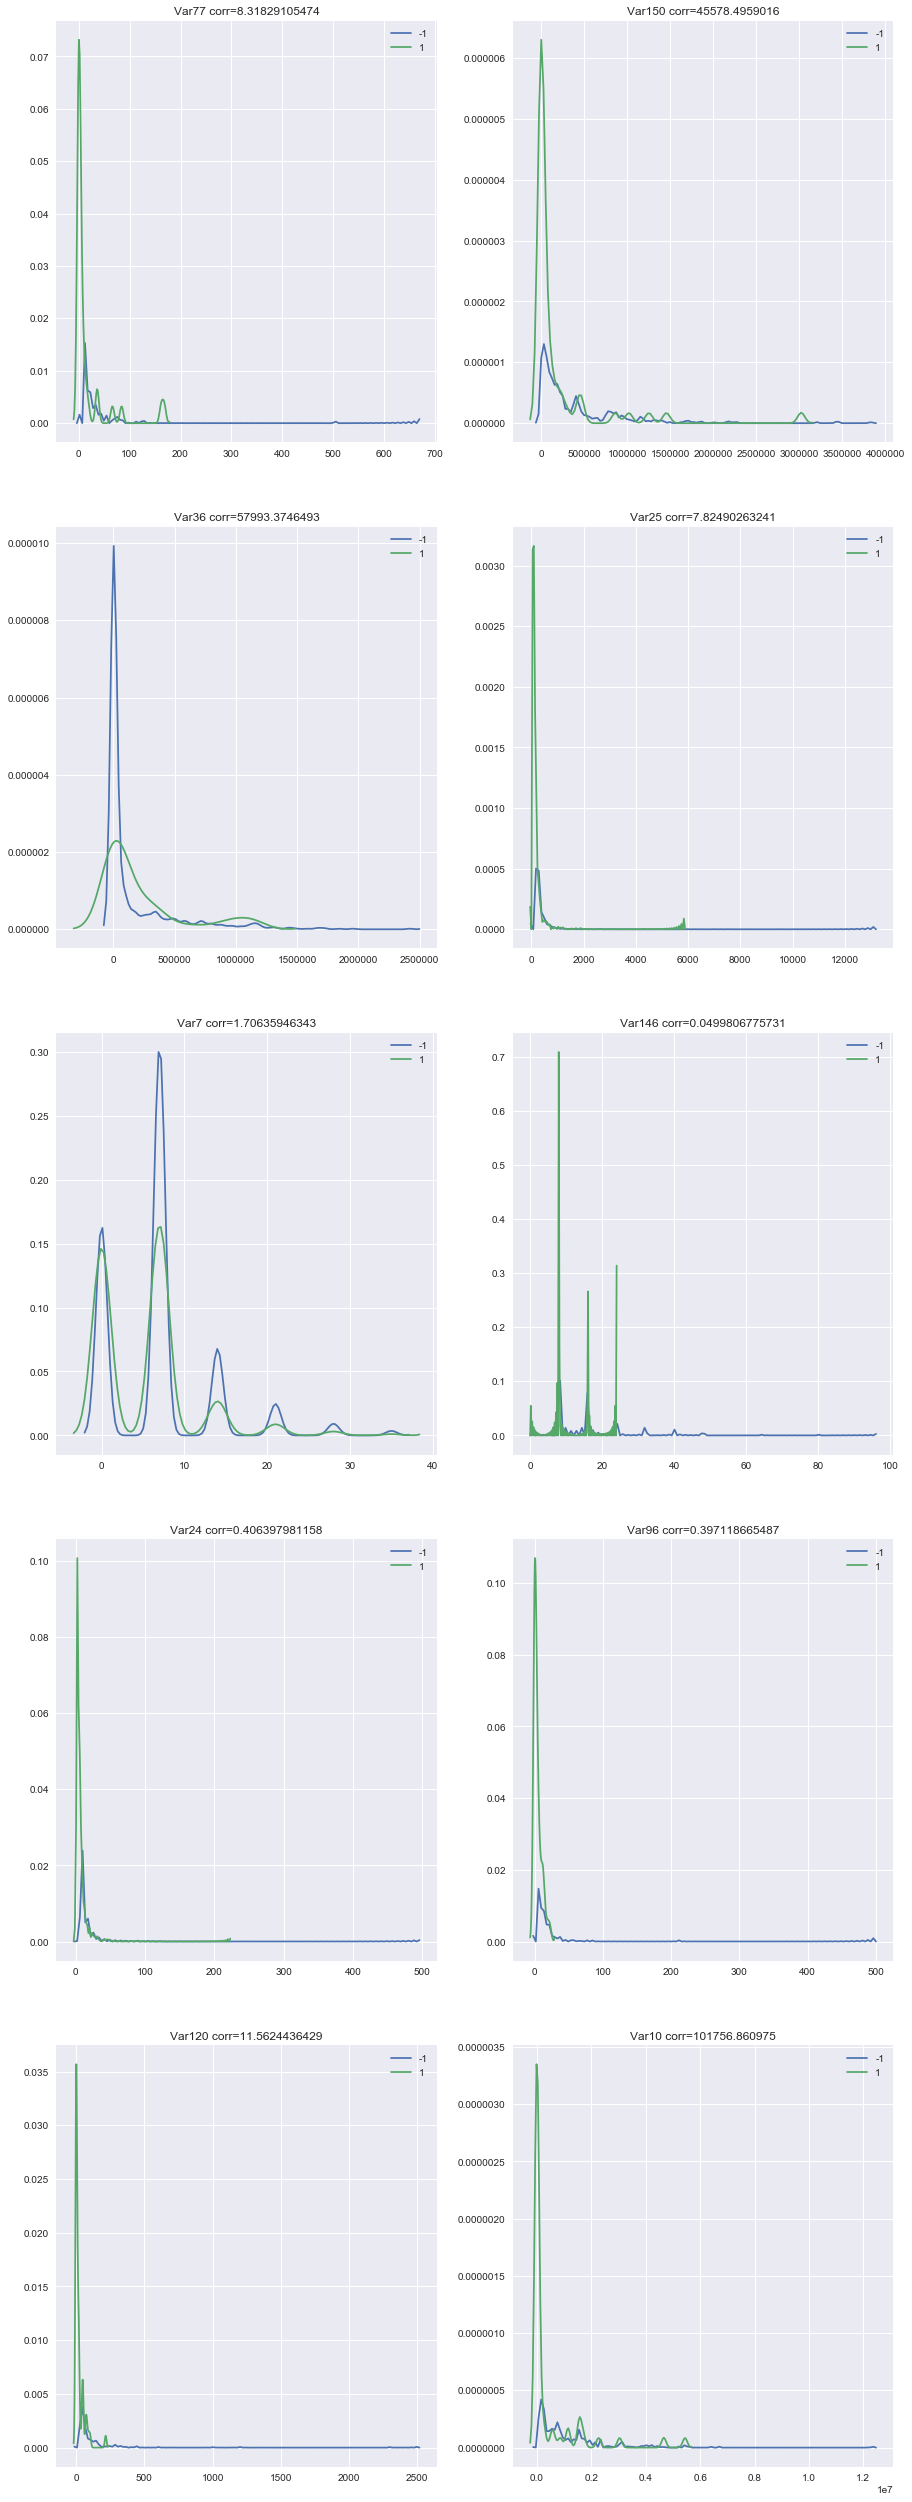

In [260]:
random.seed()
random10corr_var=list(num_corr.index)
random.shuffle(random10corr_var)
random10corr_var=random10corr_var[0:10]
plot_dist(random10corr_var)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [269]:
bottom10=num_corr[num_corr.notnull()].sort_values()[0:10]
print (bottom10)
plot_dist(bottom10)

Var118    0.000000
Var138    0.001639
Var44     0.003251
Var173    0.005087
Var2      0.005181
Var116    0.012817
Var4      0.016095
Var26     0.016762
Var29     0.018692
Var181    0.020968
dtype: float64
5 2
0.0 0 0


KeyError: 'the label [0.0] is not in the [columns]'

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

In [ ]:
1. Есть переменные которые в тесте не принимают никакого значения.
2.
3. Переменные которые не определены ни для одного объекта. Переменные с небольшой корреляцией.
4. Да окажется, отбор признаков позволит избавиться от шума и повысить качество модели.